--2022-06-05 07:01:18--  https://raw.githubusercontent.com/Rylu12/Materials_Image_Processing_with_ML/master/Composition_Semantic_Segmentation/images/train_label.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90252 (88K) [image/tiff]
Saving to: ‘train_label.tif’

train_label.tif     100%[===================>]  88.14K  --.-KB/s    in 0.01s   

2022-06-05 07:01:18 (6.83 MB/s) - ‘train_label.tif’ saved [90252/90252]

--2022-06-05 07:01:18--  https://raw.githubusercontent.com/Rylu12/Materials_Image_Processing_with_ML/master/Composition_Semantic_Segmentation/images/train_nonlabel.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserc

Text(0.5, 1.0, 'Labeled Image')

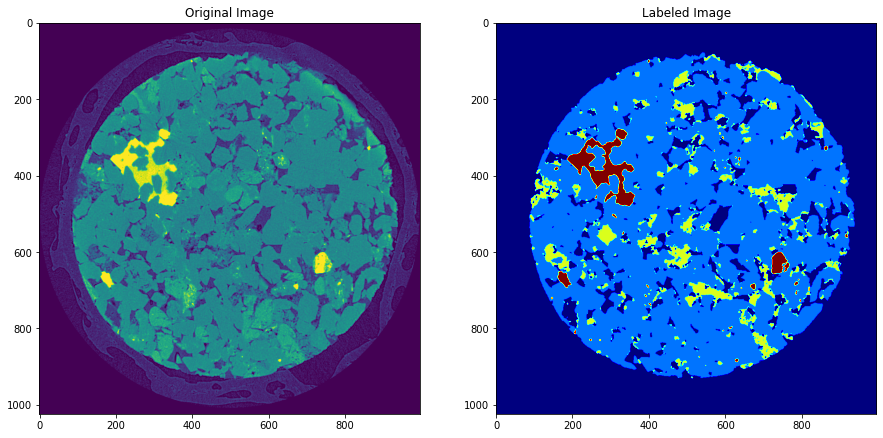

In [4]:
import cv2
from skimage.filters.rank import entropy
from skimage.morphology import disk
import pandas as pd
from matplotlib import pyplot as plt
from scipy import ndimage as nd
import numpy as np
!wget https://raw.githubusercontent.com/Rylu12/Materials_Image_Processing_with_ML/master/Composition_Semantic_Segmentation/images/train_label.tif
!wget https://raw.githubusercontent.com/Rylu12/Materials_Image_Processing_with_ML/master/Composition_Semantic_Segmentation/images/train_nonlabel.tif

img = cv2.imread('train_nonlabel.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

labeled_img = cv2.imread('train_label.tif')
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(labeled_img, cmap='jet')
plt.title('Labeled Image')


In [5]:
#Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
#For example, if DAPI contains nuclei information, extract the DAPI channel image first. 

#Multiple images can be used for training. For that, you need to concatenate the data

#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
            
                
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=5
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
print(df.head())               

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

In [6]:
#Gerate OTHER FEATURES and add them to the data frame
                
#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=3)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe
labeled_img1 = labeled_img.reshape(-1)
df['Labels'] = labeled_img1
print(df.head())    

   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0               0       0       0       0       0       0       0       0   
1               0       0       0       0       0       0       0       0   
2               0       0       0       0       0       0       0       0   
3               0       0       0       0       0       0       0       0   
4               0       0       0       0       0       0       0       0   

   Gabor8  Gabor9  ...  Canny Edge  Roberts  Sobel  Scharr  Prewitt  \
0       0       0  ...           0      0.0    0.0     0.0      0.0   
1       0       0  ...           0      0.0    0.0     0.0      0.0   
2       0       0  ...           0      0.0    0.0     0.0      0.0   
3       0       0  ...           0      0.0    0.0     0.0      0.0   
4       0       0  ...           0      0.0    0.0     0.0      0.0   

   Gaussian s3  Gaussian s7  Median s3  Variance s3  Labels  
0            0            0          0          

In [7]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Labels"].values

#Define the independent variables
X = df.drop(labels = ["Labels"], axis=1) 

#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)


# Import the model we are using
#RandomForestRegressor is for regression type of problems. 
#For classification we use RandomForestClassifier.
#Both yield similar results except for regressor the result is float
#and for classifier it is an integer. 

from sklearn.ensemble import RandomForestClassifier
# Instantiate model with n number of decision trees
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

###
#SVM
# Train the Linear SVM to compare against Random Forest
#SVM will be slower than Random Forest. 
#Make sure to comment out Fetaure importances lines of code as it does not apply to SVM.
#from sklearn.svm import LinearSVC
#model = LinearSVC(max_iter=100)  #Default of 100 is not converging


# Train the model on training data
model.fit(X_train, y_train)

# verify number of trees used. If not defined above. 
#print('Number of Trees used : ', model.n_estimators)

#STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE
#First test prediction on the training data itself. SHould be good. 
prediction_test_train = model.predict(X_train)

#Test prediction on testing data. 
prediction_test = model.predict(X_test)

#.predict just takes the .predict_proba output and changes everything 
#to 0 below a certain threshold (usually 0.5) respectively to 1 above that threshold.
#In this example we have 4 labels, so the probabilities will for each label stored separately. 
# 

#Let us check the accuracy on test data
from sklearn import metrics
#Print the prediction accuracy

#First check the accuracy on training data. This will be higher than test data prediction accuracy.
print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))
#Check accuracy on test dataset. If this is too low compared to train it indicates overfitting on training data.
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy on training data =  0.9999950975746067
Accuracy =  0.9824174800594173


In [8]:
#This part commented out for SVM testing. Uncomment for random forest. 
#One amazing feature of Random forest is that it provides us info on feature importances
# Get numerical feature importances
#importances = list(model.feature_importances_)

#Let us print them into a nice format.

feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)


Gaussian s3       0.114101
Gabor16           0.110976
Median s3         0.097546
Gabor3            0.095193
Gabor15           0.077580
Gabor8            0.074889
Gabor5            0.056828
Gabor7            0.050638
Gabor4            0.047103
Gabor6            0.041767
Gabor23           0.036146
Gabor24           0.024915
Gabor29           0.020431
Gaussian s7       0.020281
Original Image    0.019512
Gabor31           0.017859
Gabor32           0.017690
Gabor21           0.013286
Gabor30           0.010627
Prewitt           0.009761
Sobel             0.008497
Scharr            0.007577
Roberts           0.006282
Gabor20           0.005810
Gabor28           0.004440
Gabor19           0.004429
Variance s3       0.003529
Gabor22           0.001452
Canny Edge        0.000851
Gabor27           0.000004
Gabor26           0.000000
Gabor13           0.000000
Gabor25           0.000000
Gabor12           0.000000
Gabor11           0.000000
Gabor14           0.000000
Gabor17           0.000000
G

In [22]:
#dropping the least important features
df_impftr = df.drop(labels = ["Gabor18","Gabor2","Gabor9","Gabor10","Gabor1","Gabor17","Gabor14","Gabor11","Gabor12","Gabor25","Gabor13","Gabor26","Gabor27","Gabor22","Gabor19","Gabor28","Gabor20","Canny Edge","Variance s3"], axis=1) 
print(df_impftr.head())  

   Original Image  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  Gabor8  Gabor15  \
0               0       0       0       0       0       0       0        0   
1               0       0       0       0       0       0       0        0   
2               0       0       0       0       0       0       0        0   
3               0       0       0       0       0       0       0        0   
4               0       0       0       0       0       0       0        0   

   Gabor16  Gabor21  ...  Gabor31  Gabor32  Roberts  Sobel  Scharr  Prewitt  \
0        0        0  ...        0        0      0.0    0.0     0.0      0.0   
1        0        0  ...        0        0      0.0    0.0     0.0      0.0   
2        0        0  ...        0        0      0.0    0.0     0.0      0.0   
3        0        0  ...        0        0      0.0    0.0     0.0      0.0   
4        0        0  ...        0        0      0.0    0.0     0.0      0.0   

   Gaussian s3  Gaussian s7  Median s3  Labels  
0      

In [23]:
#training the model once more without the least important features

#Define the dependent variable that needs to be predicted (labels)
Y = df_impftr["Labels"].values

#Define the independent variables
X = df_impftr.drop(labels = ["Labels"], axis=1) 

#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)


from sklearn.ensemble import RandomForestClassifier
# Instantiate model with n number of decision trees
model = RandomForestClassifier(n_estimators = 100, random_state = 42)


# Train the model on training data
model.fit(X_train, y_train)


#TESTING THE MODEL 

#testing prediction on the training data itself
prediction_test_train = model.predict(X_train)

#Test prediction on testing data. 
prediction_test = model.predict(X_test)


#checking the accuracy on test data
from sklearn import metrics
#Print the prediction accuracy

#First check the accuracy on training data. This will be higher than test data prediction accuracy.
print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))
#Check accuracy on test dataset. If this is too low compared to train it indicates overfitting on training data.
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy on training data =  0.9999967317164045
Accuracy =  0.9825449429113496


In [24]:
#saving the model for future usage
import pickle

#Save the trained model as pickle string to disk 
filename = "sandstone_model"
pickle.dump(model, open(filename, 'wb')) #write binary mode wb


Text(0.5, 1.0, 'Difference between segmented and original labeled image')

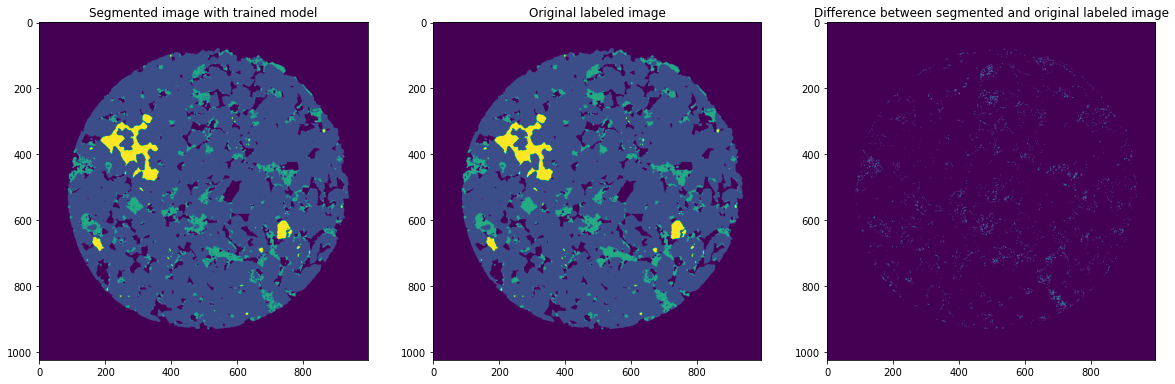

In [28]:
#To test the accuracy of the new model 
loaded_model = pickle.load(open(filename, 'rb')) #read binary mode rb
result = loaded_model.predict(X)

segmented = result.reshape((img.shape))
plt.imsave('segmented_rock_RF_100_estim.jpg', segmented, cmap ='jet')


plt.figure(figsize=(20, 30))
plt.subplot(131)
plt.imshow(segmented)
plt.title('Segmented image with trained model')
plt.subplot(132)
plt.imshow(labeled_img)
plt.title('Original labeled image')
plt.subplot(133)
plt.imshow(segmented - labeled_img)
plt.title('Difference between segmented and original labeled image')

In [30]:
#defining a feature extraction function (only important features)

 
def feature_extraction(img):
    df = pd.DataFrame()


#All features generated must match the way features are generated for TRAINING.
#Feature1 is our original image pixels
    img2 = img.reshape(-1)
    df['Original Image'] = img2

#Generate Gabor features
    num = 1
    kernels = []
    for theta in range(2):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
#               print(theta, sigma, , lamda, frequency)
                
                    gabor_label = 'Gabor' + str(num)
#                    print(gabor_label)
                    ksize=9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter image and add values to new column
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  #Modify this to add new column for each gabor
                    num += 1
#Feature 3 is canny edge
    # edges = cv2.Canny(img, 100,200)   #Image, min and max values
    # edges1 = edges.reshape(-1)
    # df['Canny Edge'] = edges1 #Add column to original dataframe

    from skimage.filters import roberts, sobel, scharr, prewitt

#Feature 4 is Roberts edge
    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1

#Feature 5 is Sobel
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1

#Feature 6 is Scharr
    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1

    #Feature 7 is Prewitt
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1

    #Feature 8 is Gaussian with sigma=3
    from scipy import ndimage as nd
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    #Feature 9 is Gaussian with sigma=7
    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    #Feature 10 is Median with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    # #Feature 11 is Variance with size=3
    # variance_img = nd.generic_filter(img, np.var, size=3)
    # variance_img1 = variance_img.reshape(-1)
    # df['Variance s3'] = variance_img1  #Add column to original dataframe

    df = df.drop(labels = ["Gabor18","Gabor2","Gabor9","Gabor10","Gabor1","Gabor17","Gabor14","Gabor11","Gabor12","Gabor25","Gabor13","Gabor26","Gabor27","Gabor22","Gabor19","Gabor28","Gabor20"], axis=1) 

    return df

#dropping the least important Gabor features


In [38]:
# testing the model on two new images
!wget https://raw.githubusercontent.com/Rylu12/Materials_Image_Processing_with_ML/master/Composition_Semantic_Segmentation/images/test_sandstone1.tif
!wget https://raw.githubusercontent.com/Rylu12/Materials_Image_Processing_with_ML/master/Composition_Semantic_Segmentation/images/test_sandstone2.tif

test_img1 = cv2.imread('test_sandstone1.tif')
test_img1 = cv2.cvtColor(test_img1, cv2.COLOR_BGR2GRAY)  

test_img2 = cv2.imread('test_sandstone2.tif')
test_img2 = cv2.cvtColor(test_img2, cv2.COLOR_BGR2GRAY)

--2022-06-05 08:04:40--  https://raw.githubusercontent.com/Rylu12/Materials_Image_Processing_with_ML/master/Composition_Semantic_Segmentation/images/test_sandstone1.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1020116 (996K) [image/tiff]
Saving to: ‘test_sandstone1.tif.5’

test_sandstone1.tif 100%[===================>] 996.21K  --.-KB/s    in 0.05s   

2022-06-05 08:04:40 (21.5 MB/s) - ‘test_sandstone1.tif.5’ saved [1020116/1020116]

--2022-06-05 08:04:40--  https://raw.githubusercontent.com/Rylu12/Materials_Image_Processing_with_ML/master/Composition_Semantic_Segmentation/images/test_sandstone2.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercont

Text(0.5, 1.0, 'Segmented Test Image 2')

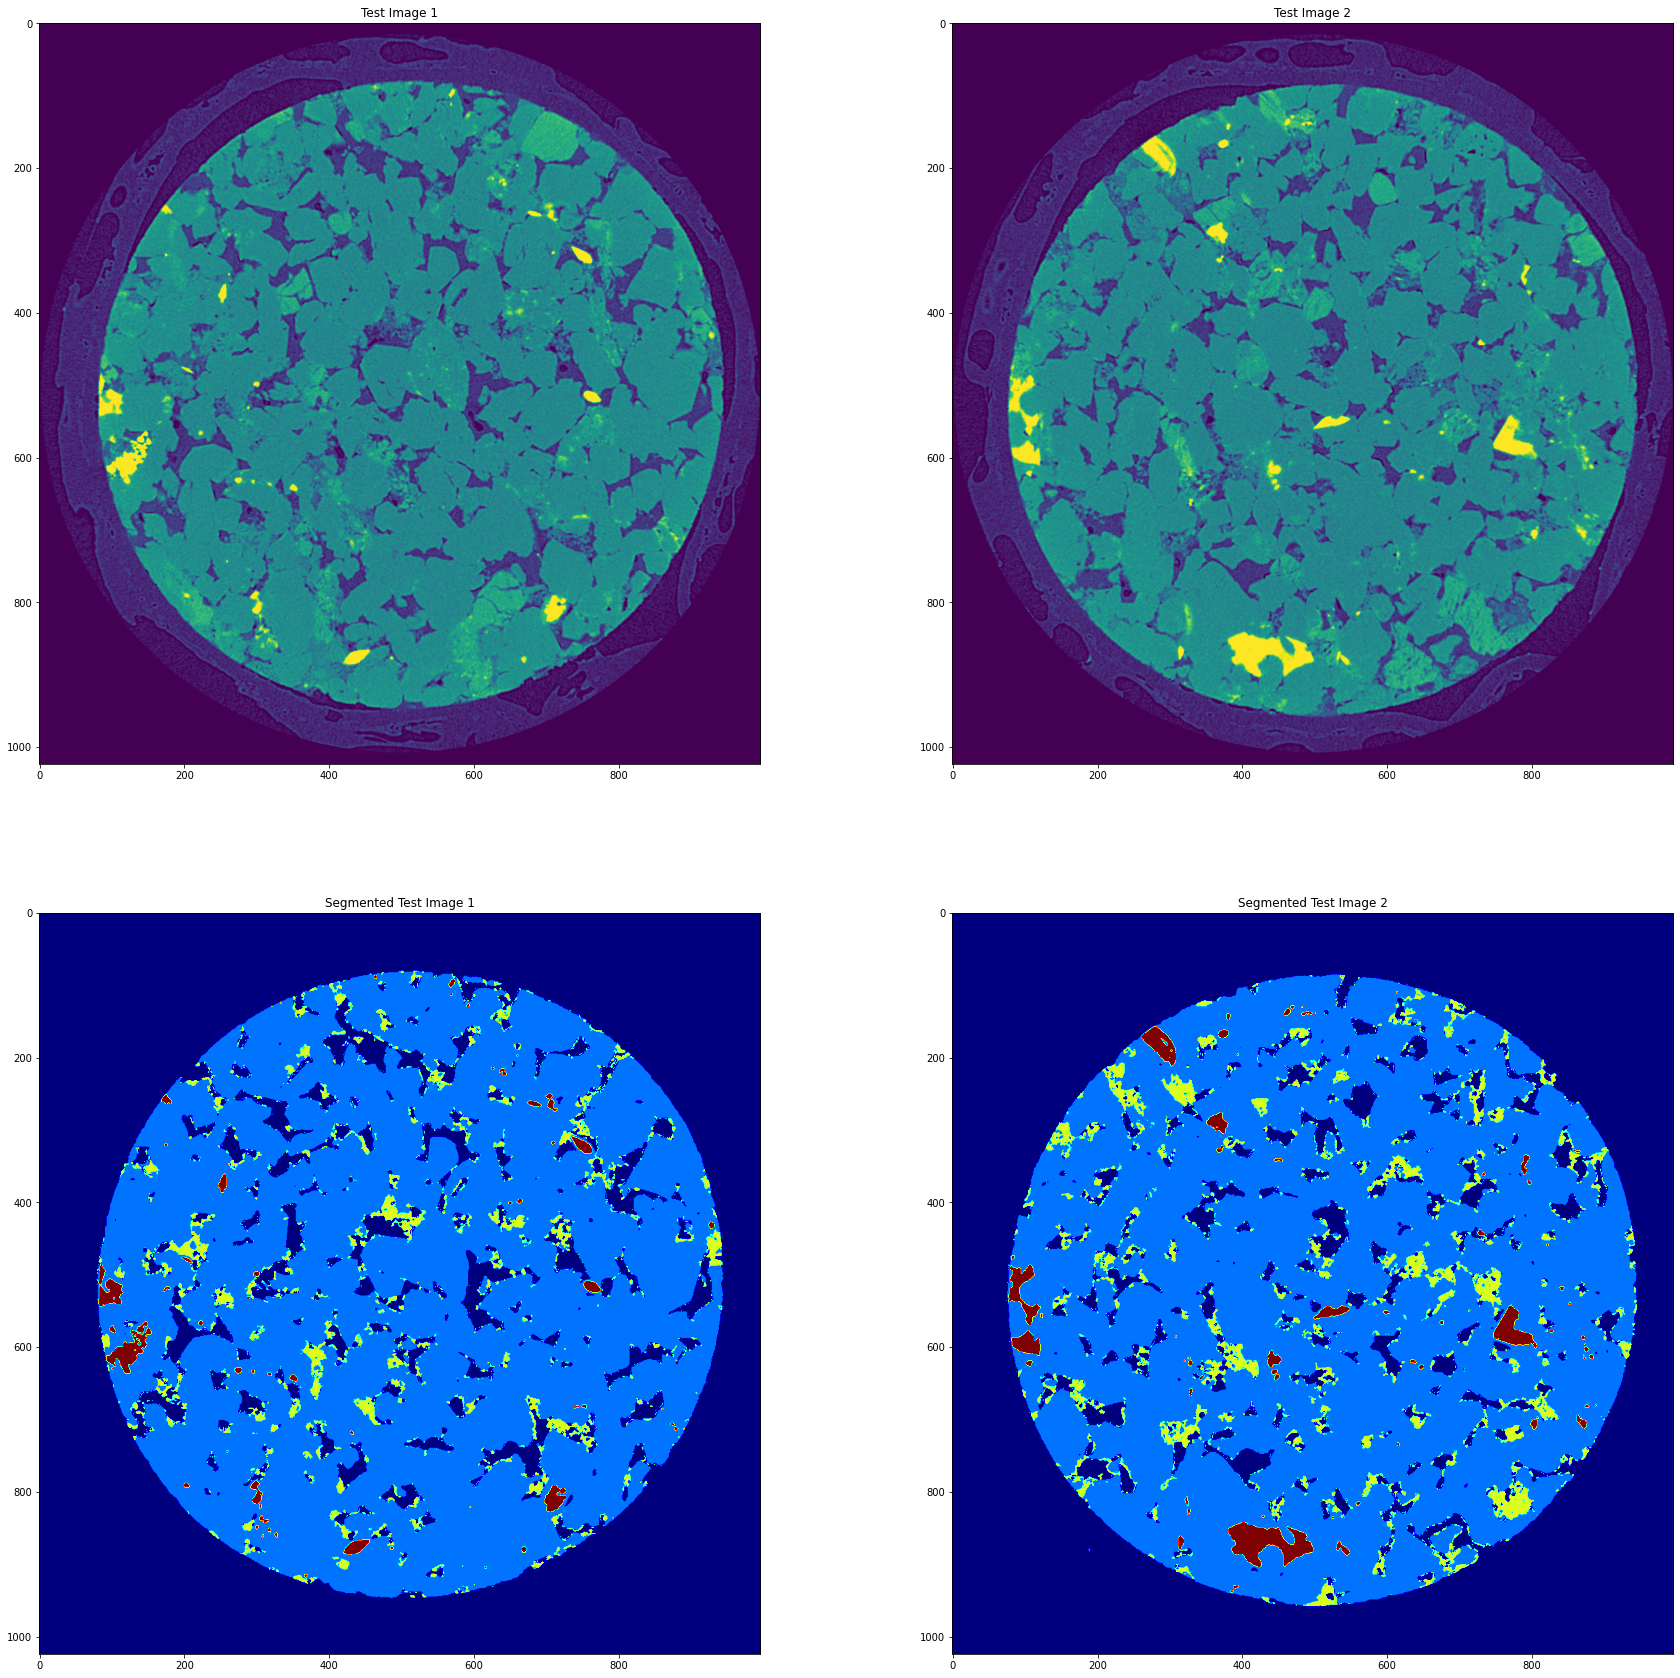

In [37]:
#Loading the model
loaded_model = pickle.load(open(filename, 'rb')) #read binary mode rb

# extracting the features from image test 1 and 2 and apply the model on them
X1 = feature_extraction(test_img1)
result1 = loaded_model.predict(X1)
segmented1 = result1.reshape((test_img1.shape))

X2 = feature_extraction(test_img2)
result2 = loaded_model.predict(X2)
segmented2 = result2.reshape((test_img2.shape))


plt.figure(figsize=(30, 30))
plt.subplot(221)
plt.imshow(test_img1)
plt.title('Test Image 1')
plt.subplot(222)
plt.imshow(test_img2)
plt.title('Test Image 2')
plt.subplot(223)
plt.imshow(segmented1, cmap ='jet')
plt.title('Segmented Test Image 1')
plt.subplot(224)
plt.imshow(segmented2, cmap ='jet')
plt.title('Segmented Test Image 2')